In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [3]:
file_path = r'C:\Users\OM SHANTI\Downloads\customers-10000.xlsx'
df = pd.read_excel(file_path, parse_dates = ['Subscription Date'])
df.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,EB54EF1154C3A78,Heather,Callahan,Mosley-David,Lake Jeffborough,Norway,043-797-5229,915.112.1727,urangel@espinoza-francis.net,2020-08-26,http://www.escobar.org/
1,2,10dAcafEBbA5FcA,Kristina,Ferrell,"Horn, Shepard and Watson",Aaronville,Andorra,932-062-1802,(209)172-7124x3651,xreese@hall-donovan.com,2020-04-27,https://tyler-pugh.info/
2,3,67DAB15Ebe4BE4a,Briana,Andersen,Irwin-Oneal,East Jordan,Nepal,8352752061,(567)135-1918,haleybraun@blevins-sexton.com,2022-03-22,https://www.mack-bell.net/
3,4,6d350C5E5eDB4EE,Patty,Ponce,Richardson Group,East Kristintown,Northern Mariana Islands,302.398.3833,196-189-7767x770,hohailey@anthony.com,2020-07-02,https://delacruz-freeman.org/
4,5,5820deAdCF23EFe,Kathleen,Mccormick,Carson-Burch,Andresmouth,Macao,001-184-153-9683x1497,552.051.2979x342,alvaradojesse@rangel-shields.com,2021-01-17,https://welch.info/


#Changing Column Names

In [4]:
df.columns = [s.lower().replace(' ', '_') for s in df.columns]
df.columns

Index(['index', 'customer_id', 'first_name', 'last_name', 'company', 'city',
       'country', 'phone_1', 'phone_2', 'email', 'subscription_date',
       'website'],
      dtype='object')

In [5]:
df['customer_id'].is_unique

True

#Dropping unnecessary columns

In [6]:
#Since customer_id uniquely identifies each row we can safely our drop Index column

df = df.drop(columns = {'index'})

df.head()

,customer_id,first_name,last_name,company,city,country,phone_1,phone_2,email,subscription_date,website
0,EB54EF1154C3A78,Heather,Callahan,Mosley-David,Lake Jeffborough,Norway,043-797-5229,915.112.1727,urangel@espinoza-francis.net,2020-08-26,http://www.escobar.org/
1,10dAcafEBbA5FcA,Kristina,Ferrell,"Horn, Shepard and Watson",Aaronville,Andorra,932-062-1802,(209)172-7124x3651,xreese@hall-donovan.com,2020-04-27,https://tyler-pugh.info/
2,67DAB15Ebe4BE4a,Briana,Andersen,Irwin-Oneal,East Jordan,Nepal,8352752061,(567)135-1918,haleybraun@blevins-sexton.com,2022-03-22,https://www.mack-bell.net/
3,6d350C5E5eDB4EE,Patty,Ponce,Richardson Group,East Kristintown,Northern Mariana Islands,302.398.3833,196-189-7767x770,hohailey@anthony.com,2020-07-02,https://delacruz-freeman.org/
4,5820deAdCF23EFe,Kathleen,Mccormick,Carson-Burch,Andresmouth,Macao,001-184-153-9683x1497,552.051.2979x342,alvaradojesse@rangel-shields.com,2021-01-17,https://welch.info/


#Creating a Function To Clean Series Of Strings

In [7]:
"""
This will remove nulls, 
leading and trailing spaces
apply lower case
replace punctuation with empty string
remove multiple spaces with single space

"""


def clean_string(s):
    cleaned = (
        s
        .fillna(' ')
        .str.strip()
        .str.lower()
        .str.replace(r'[^\w\s]', ' ', regex = True)
        .str.replace(r'\s+', ' ', regex = True)
        .str.strip()
    )

    return cleaned

#Name Normalization

In [8]:
#Applying Consistent Case

df['first_name_clean'] = clean_string(df['first_name'])
df['last_name_clean'] = clean_string(df['last_name'])

#Flagging Invalid Names

df['invalid_name'] = (
    (df['first_name'].str.contains(r'[^A-Za-z]', na = False)) |
    (df['first_name'].str.len() <= 1) |
    (df['first_name'].isnull()) |
    (df['last_name'].str.contains(r'[^A-Za-z]', na = False)) |
    (df['last_name'].str.len() <= 1) |
    (df['last_name'].isnull())
)

#Fullname Key

df['full_name'] = df['first_name_clean'] + ' ' + df['last_name_clean']

#Possible Duplicate

df['possible_duplicates'] = (
    (df.duplicated(subset = ['full_name', 'email'])) |
    (df.duplicated(subset = ['full_name', 'phone_1'])) |
    (df.duplicated(subset = ['full_name', 'phone_2']))
)


df[['first_name_clean', 'last_name_clean', 'full_name', 'invalid_name', 'possible_duplicates']].head()

,first_name_clean,last_name_clean,full_name,invalid_name,possible_duplicates
0,heather,callahan,heather callahan,False,False
1,kristina,ferrell,kristina ferrell,False,False
2,briana,andersen,briana andersen,False,False
3,patty,ponce,patty ponce,False,False
4,kathleen,mccormick,kathleen mccormick,False,False


#Company Name Standardization

In [125]:
#Applying Consistent Case

df['company_name_clean'] = (
    clean_string(df['company'])
    .str.replace(r'\b(ltd|limited|llc|inc|corp)\b$', '', case = False, regex = True)
)

df[['company', 'company_name_clean']].head()

,company,company_name_clean
0,Mosley-David,mosley david
1,"Horn, Shepard and Watson",horn shepard and watson
2,Irwin-Oneal,irwin oneal
3,Richardson Group,richardson group
4,Carson-Burch,carson burch


#Customers Working At Same Company Under Differnt Name

In [10]:
ans = (
    df.groupby('company_name_clean').agg(
        customer_count = ('customer_id', 'nunique'),
        raw_names = ('company', lambda x: list(set(x)))
    ).reset_index()
)

ans.query('customer_count > 1').head()

,company_name_clean,customer_count,raw_names
6,abbott group,2,[Abbott Group]
11,acevedo,2,"[Acevedo Ltd, Acevedo Inc]"
17,acosta group,2,[Acosta Group]
35,adkins,2,"[Adkins Ltd, Adkins Inc]"
46,aguilar,2,"[Aguilar LLC, Aguilar Ltd]"


#Country And City Quality Checks 

In [11]:
#Validating Country And City Values (spelling, casing, whitespace)

df['clean_country_name'] = (
    clean_string(df['country'])
    .str.title()
)

df['clean_city_name'] = (
    clean_string(df['city'])
    .str.title()
    
)

df[['clean_country_name', 'clean_city_name']].head()

,clean_country_name,clean_city_name
0,Norway,Lake Jeffborough
1,Andorra,Aaronville
2,Nepal,East Jordan
3,Northern Mariana Islands,East Kristintown
4,Macao,Andresmouth


#Importing CSV File With Country Names And Their Dialing Code

In [12]:
path = r'C:\Users\OM SHANTI\Downloads\Country_2-3_Digits_Codes.csv'
country_codes = pd.read_csv(path)

country_codes.columns = [s.lower() for s in country_codes.columns]

country_codes.head()

,country,a2,a3,num,dialingcode
0,Afghanistan,AF,AFG,4,93
1,Albania,AL,ALB,8,355
2,Algeria,DZ,DZA,12,213
3,American Samoa,AS,ASM,16,1-684
4,Andorra,AD,AND,20,376


#Handling Phone Numbers

In [13]:
def clean_phone(s):
    s = s.astype('string')
    
    phone = s.str.replace(r'\D', '', regex = True).fillna('No Num')

    ext = s.str.extract(r'(?i)(?:x|ext\.?)\s*(\d+)').fillna('No Ext')

    return phone, ext

df['clean_phone1'], df['phone1_ext'] = clean_phone(df['phone_1'])
df['clean_phone2'], df['phone2_ext'] = clean_phone(df['phone_2'])

df_merged = pd.merge(df, country_codes, how = 'left', left_on = 'clean_country_name', right_on = 'country')
df['country_code'] = df_merged['dialingcode']

df[['clean_phone1', 'clean_phone2', 'phone1_ext', 'phone2_ext', 'country_code']].head()

,clean_phone1,clean_phone2,phone1_ext,phone2_ext,country_code
0,0437975229,9151121727,No Ext,No Ext,47
1,9320621802,20917271243651,No Ext,3651,376
2,8352752061,5671351918,No Ext,No Ext,977
3,3023983833,1961897767770,No Ext,770,1-670
4,00118415396831497,5520512979342,1497,342,853


#Email Validation

In [14]:
df['invalid_email'] = ~df['email'].str.contains(r'^[A-Za-z0-9._%+-]+@[A-Za-z0-9-]+\.[A-Za-z]{2,}$', na = False)

df['duplicate_email'] = df['email'].duplicated(keep = False)

#Customers Sharing Same Emails

valid_email = df[~df['invalid_email']]

same_email = valid_email.groupby('email', as_index = False).agg(
    customer_count = ('customer_id', 'nunique')
).query('customer_count > 1')

#Household Or Corporate Emails

df['email_type'] = np.where(
    df['email'].str.contains(r'@gmail|yahoo|outlook|hotmail\.', case = False, na = False, regex = True),
    'Household',
    'Corporate'
)

df[['email', 'invalid_email', 'duplicate_email', 'email_type']].head()

,email,invalid_email,duplicate_email,email_type
0,urangel@espinoza-francis.net,False,False,Corporate
1,xreese@hall-donovan.com,False,False,Corporate
2,haleybraun@blevins-sexton.com,False,False,Corporate
3,hohailey@anthony.com,False,False,Corporate
4,alvaradojesse@rangel-shields.com,False,False,Corporate


#Webbsite Standardization

In [17]:
df['clean_website'] = (
    df['website']
    .fillna('No Website') 
    .str.strip()
    .str.lower()
    .str.replace(r'/$|\s+', '', regex = True)
    .apply(lambda x: x.replace('www.', '') if 'www.' in x else x)
)

df = df.assign(
    invalid_website = ~df['clean_website'].str.contains(r'^https://[a-z-.0-9]+\.[a-z]{2,}$'),
    domain = df['clean_website'].str.extract(r'^https://([a-z-.]+\.[a-z]+)'),
    tld = df['domain'].str.extract(r'^[a-z-.]+\.([a-z]+)'),
    has_https = df['clean_website'].str.contains(r'^https'),
    has_www = df['website'].str.contains(r'^https?://www\.')
)

df[['website', 'clean_website', 'invalid_website', 'domain', 'tld', 'has_https', 'has_www']].head()

,website,clean_website,invalid_website,domain,tld,has_https,has_www
0,http://www.escobar.org/,http://escobar.org,True,NaN,NaN,False,True
1,https://tyler-pugh.info/,https://tyler-pugh.info,False,tyler-pugh.info,info,True,False
2,https://www.mack-bell.net/,https://mack-bell.net,False,mack-bell.net,net,True,True
3,https://delacruz-freeman.org/,https://delacruz-freeman.org,False,delacruz-freeman.org,org,True,False
4,https://welch.info/,https://welch.info,False,welch.info,info,True,False


#Subscription Date Cleaning

In [21]:
df['subscription_date'] = pd.to_datetime(df['subscription_date'], format = '%Y-%m-%d', errors = 'coerce')

df = df.assign(
    subscription_year = df['subscription_date'].dt.year,
    subscription_month = df['subscription_date'].dt.month,
    customer_tenure_days = (pd.Timestamp.today() - df['subscription_date']).dt.days,
    future_subscription_flag = df['customer_tenure_days'] < 0
)

df[['subscription_date', 'subscription_year', 'subscription_month', 'customer_tenure_days', 'future_subscription_flag']].head()

,subscription_date,subscription_year,subscription_month,customer_tenure_days,future_subscription_flag
0,2020-08-26,2020,8,1981,False
1,2020-04-27,2020,4,2102,False
2,2022-03-22,2022,3,1408,False
3,2020-07-02,2020,7,2036,False
4,2021-01-17,2021,1,1837,False


#Ranking Customers Based On Correctness Score

In [22]:
has_phones = df[['phone_1', 'phone_2']].notnull().any(axis = 1).astype(int)

has_websites = df['website'].notnull().astype(int)

df['correctness_score'] = has_phones + has_websites + df['invalid_email'].eq(False)

df['rank'] = df['correctness_score'].rank(method = 'dense', ascending = False).astype(int)

df[['correctness_score', 'rank']].head()

,correctness_score,rank
0,3,1
1,3,1
2,3,1
3,3,1
4,3,1


#Customer Acquisition Over Time

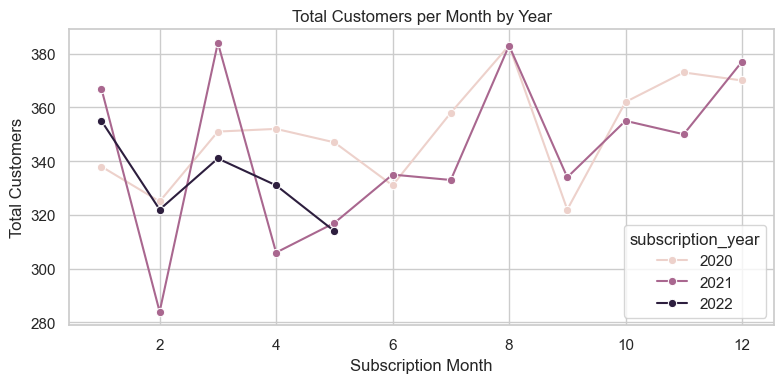

In [68]:
customers_per_year_and_month = df.groupby(['subscription_year', 'subscription_month'], as_index = False).agg(
    total_customers = ('customer_id', 'count')
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.lineplot(
    data=customers_per_year_and_month,
    x="subscription_month",
    y="total_customers",
    hue="subscription_year",
    marker="o"
)

plt.title("Total Customers per Month by Year")
plt.xlabel("Subscription Month")
plt.ylabel("Total Customers")
plt.tight_layout()
plt.show()

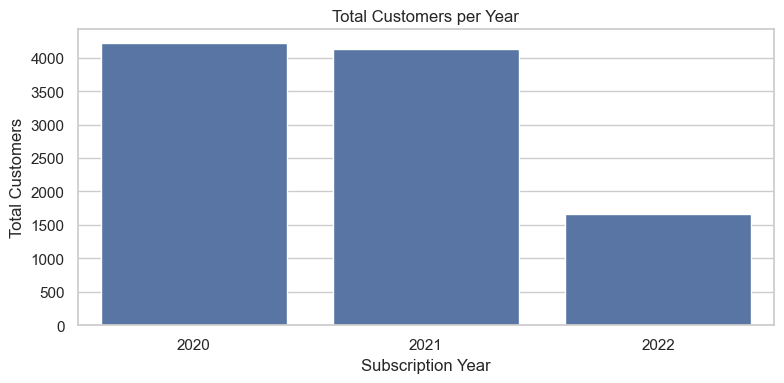

In [51]:
customers_per_year = df.groupby('subscription_year', as_index = False).agg(
    total_customers = ('customer_id', 'count')
)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.barplot(
    data=customers_per_year,
    x="subscription_year",
    y="total_customers"
)

plt.title("Total Customers per Year")
plt.xlabel("Subscription Year")
plt.ylabel("Total Customers")
plt.tight_layout()
plt.show()

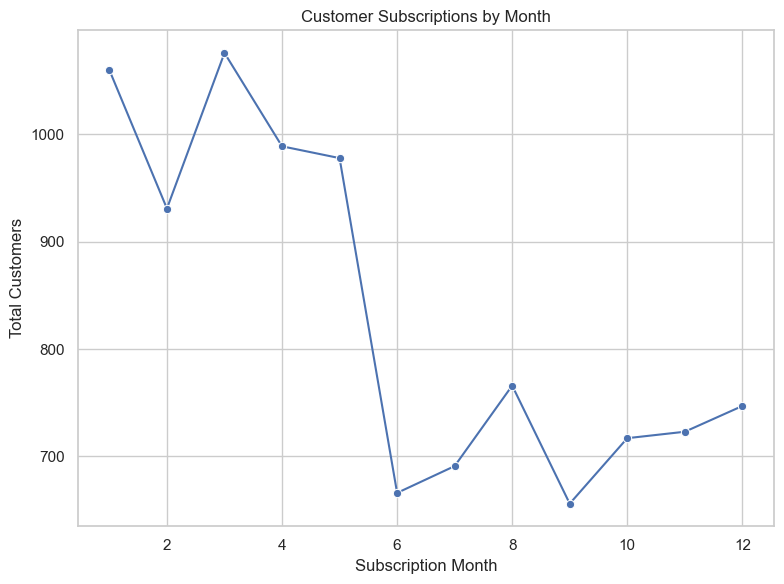

In [84]:
customers_per_month = df.groupby('subscription_month', as_index = False).agg(
    total_customers = ('customer_id', 'count')
)

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=customers_per_month,
    x="subscription_month",
    y="total_customers",
    marker="o"
)

plt.title("Customer Subscriptions by Month")
plt.xlabel("Subscription Month")
plt.ylabel("Total Customers")
plt.tight_layout()
plt.show()

#This chart represents month-wise seasonality aggregated across years

In [67]:
peak_month = customers_per_month[customers_per_month['total_customers'] == customers_per_month['total_customers'].max()]
print('Peak Month:\n', peak_month, '\n')

lowest_month = peak_month = customers_per_month[customers_per_month['total_customers'] == customers_per_month['total_customers'].min()]
print('Lowest Month:\n', peak_month, '\n')

peak_year = customers_per_year[customers_per_year['total_customers'] == customers_per_year['total_customers'].max()]
print('Peakt Year:\n', peak_year, '\n')

lowest_year = customers_per_year[customers_per_year['total_customers'] == customers_per_year['total_customers'].min()]
print('Lowest Year:\n', lowest_year, '\n')

Peak Month:
    subscription_month  total_customers
2                   3             1076 

Lowest Month:
    subscription_month  total_customers
8                   9              656 

Peakt Year:
    subscription_year  total_customers
0               2020             4212 

Lowest Year:
    subscription_year  total_customers
2               2022             1663 



In [83]:
#Sudden Drops >20%
customers_per_year_and_month = customers_per_year_and_month.sort_values(by = ['subscription_year', 'subscription_month'])

customers_per_year_and_month['sudden_drop'] = (
    ((
        customers_per_year_and_month['total_customers'] - customers_per_year_and_month['total_customers'].shift(1) 
    ) / customers_per_year_and_month['total_customers'].shift(1)
) * 100).round(2) < -20

customers_per_year_and_month.query('sudden_drop == True')

,subscription_year,subscription_month,total_customers,sudden_drop
13,2021,2,284,True
15,2021,4,306,True


In [104]:
days = [0, 91, 181, 366, 1096, float('inf')]
periods = ['0-3 Months', '3-6 Months', '6-12 Months', '1-3 Years', '3+ Years']

df['customer_duration'] = pd.cut(df['customer_tenure_days'], bins = days, labels = periods, right = False)

df[['customer_tenure_days', 'customer_duration']].head()

,customer_tenure_days,customer_duration
0,1981,3+ Years
1,2102,3+ Years
2,1408,3+ Years
3,2036,3+ Years
4,1837,3+ Years


In [103]:
df[['customer_duration']].value_counts()

customer_duration
3+ Years             10000
0-3 Months               0
3-6 Months               0
6-12 Months              0
1-3 Years                0
Name: count, dtype: int64

#Top 5 Countries By Customer Count

In [124]:
highest_customers = df.groupby('clean_country_name', as_index = False).agg(
    total_customers = ('customer_id', 'nunique')
).sort_values(by = 'total_customers', ascending = False).head(5)

highest_customers 

,clean_country_name,total_customers
114,Korea,84
49,Congo,81
235,Vanuatu,58
195,Sierra Leone,56
144,Montenegro,54


#Top 5 Countries By Highest Missing Phone/email rate

In [122]:
df['is_unaccountable'] = (
    df['phone_1'].isnull() &
    df['phone_2'].isnull() &
    df['email'].isnull()
)

country_missing = df.groupby('clean_country_name', as_index = False).agg(
    total_customers = ('customer_id', 'count'),
    unaacountable_customers = ('is_unaccountable', 'sum')
)

country_missing['missing_rate_pct'] = (
    (country_missing['unaacountable_customers'] / country_missing['total_customers'])
* 100).round(2)

country_missing.sort_values(by = 'missing_rate_pct', ascending = False).head(5)

,clean_country_name,total_customers,unaacountable_customers,missing_rate_pct
0,Afghanistan,41,0,0.0
1,Albania,49,0,0.0
2,Algeria,33,0,0.0
3,American Samoa,48,0,0.0
4,Andorra,54,0,0.0
